In [20]:
import pandas as pd 
diabetes = pd.read_csv(r"C:\Users\molab\Documents\Data Science\diabetes\Dataset_of_diabetes.csv", index_col = 'ID')
diabetes.head()

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
ID,,,,,,,,,,,,,
502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [21]:
diabetes = diabetes.drop(columns='No_Pation')
for col in diabetes.columns:
    unique_values = diabetes[col].unique()
    print(f'{col} {len(unique_values)} unique')
    print(unique_values)

Gender 3 unique
['F' 'M' 'f']
AGE 50 unique
[50 26 33 45 48 43 32 31 30 49 42 39 41 44 47 36 38 46 35 40 59 51 57 63
 25 60 77 54 34 55 28 56 52 69 73 61 58 53 66 68 62 64 67 70 79 76 65 75
 20 71]
Urea 110 unique
[ 4.7    4.5    7.1    2.3    2.     2.6    3.6    4.4    3.3    3.
  4.6    3.5    5.5    5.9    2.2    3.8   13.5    5.     5.3    4.
  3.2    4.8    4.2    4.3    7.5    5.6    6.     3.4    4.1    2.7
  5.7    3.7    3.1    2.4    5.4    2.1    3.9    2.8    7.6    6.8
  5.2    6.3    6.6    5.8   10.     9.6    7.3   22.     6.1   17.1
  7.7    1.8    5.1    9.1    8.5    6.5    4.16   8.7   20.8    1.2
  2.9   14.1    9.9    9.3   11.7    7.8    4.9    8.    20.     4.66
 14.     6.2    5.66   6.66   3.66  10.5    7.     6.4   10.4    1.9
  3.33   8.6    2.5   14.5    8.9    6.7   11.3   11.     0.5   13.2
 24.    10.3    7.4    6.833 11.1   13.3    7.9    7.2    1.1    9.
 14.9    4.33   9.2   11.2   38.9    6.9   26.4    8.1    8.2    8.8  ]
Cr 113 unique
[ 46  62  24

In [22]:
diabetes['Gender'] = diabetes['Gender'].replace('f', 'F')
diabetes['CLASS'] = diabetes['CLASS'].str.strip()
for col in diabetes.columns:
    unique_values = diabetes[col].unique()
    print(f'{col} {len(unique_values)} unique')
    print(unique_values)


Gender 2 unique
['F' 'M']
AGE 50 unique
[50 26 33 45 48 43 32 31 30 49 42 39 41 44 47 36 38 46 35 40 59 51 57 63
 25 60 77 54 34 55 28 56 52 69 73 61 58 53 66 68 62 64 67 70 79 76 65 75
 20 71]
Urea 110 unique
[ 4.7    4.5    7.1    2.3    2.     2.6    3.6    4.4    3.3    3.
  4.6    3.5    5.5    5.9    2.2    3.8   13.5    5.     5.3    4.
  3.2    4.8    4.2    4.3    7.5    5.6    6.     3.4    4.1    2.7
  5.7    3.7    3.1    2.4    5.4    2.1    3.9    2.8    7.6    6.8
  5.2    6.3    6.6    5.8   10.     9.6    7.3   22.     6.1   17.1
  7.7    1.8    5.1    9.1    8.5    6.5    4.16   8.7   20.8    1.2
  2.9   14.1    9.9    9.3   11.7    7.8    4.9    8.    20.     4.66
 14.     6.2    5.66   6.66   3.66  10.5    7.     6.4   10.4    1.9
  3.33   8.6    2.5   14.5    8.9    6.7   11.3   11.     0.5   13.2
 24.    10.3    7.4    6.833 11.1   13.3    7.9    7.2    1.1    9.
 14.9    4.33   9.2   11.2   38.9    6.9   26.4    8.1    8.2    8.8  ]
Cr 113 unique
[ 46  62  24  50

In [23]:
diabetes.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
ID,,,,,,,,,,,,
502,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
735,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
420,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
680,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
504,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, mean_squared_error, r2_score

In [25]:
features = ['Gender', 'AGE', 'Urea', 'Cr', 'HDL', 'Chol', 'TG', 'LDL', 'VLDL', 'BMI', 'CLASS']
X = diabetes[features]
y = diabetes['HbA1c']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1) # 80% training and 20% validation

In [30]:
y.value_counts(normalize=True)

HbA1c
8.00     0.034
9.00     0.032
7.00     0.032
4.00     0.030
6.80     0.030
         ...  
4.70     0.001
12.90    0.001
2.00     0.001
6.60     0.001
9.96     0.001
Name: proportion, Length: 111, dtype: float64

In [26]:
categorical_col = ['Gender', 'CLASS']
numerical_col = ['AGE', 'Urea', 'Cr', 'HDL', 'Chol', 'TG', 'LDL', 'VLDL', 'BMI']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_col),
        ('num', 'passthrough', numerical_col)
    ])
# Create a pipeline that includes the preprocessor and the model
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestRegressor(random_state=42, n_estimators=200, max_depth=20))
        ])

model.fit(train_X, train_y)
y_preds = model.predict(val_X)
print("MSE:", mean_squared_error(val_y, y_preds))
print("R2 Score:", r2_score(val_y, y_preds))

MSE: 2.556457766670832
R2 Score: 0.5952496972261878


In [27]:
categorical_col = ['Gender', 'CLASS']
numerical_col = ['AGE', 'Urea', 'Cr', 'HDL', 'Chol', 'TG', 'LDL', 'VLDL', 'BMI']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_col),
        ('num', 'passthrough', numerical_col)
    ])
# Create a pipeline that includes the preprocessor and the model
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBRegressor(eval_metric='mlogloss'))
        ])

model.fit(train_X, train_y)
y_preds = model.predict(val_X)
print("MSE:", mean_squared_error(val_y, y_preds))
print("R2 Score:", r2_score(val_y, y_preds))

MSE: 2.7306063467708
R2 Score: 0.5676776827606863


In [28]:
'''
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False],
    'classifier__criterion': ['squared_error', 'absolute_error'] 
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=1)
grid_search.fit(train_X, train_y)

print("Best parameters:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)
'''

'\nparam_grid = {\n    \'classifier__n_estimators\': [100, 200, 300],\n    \'classifier__max_depth\': [None, 10, 20, 30],\n    \'classifier__min_samples_split\': [2, 5, 10],\n    \'classifier__min_samples_leaf\': [1, 2, 4],\n    \'classifier__bootstrap\': [True, False],\n    \'classifier__criterion\': [\'squared_error\', \'absolute_error\'] \n}\n\ngrid_search = GridSearchCV(model, param_grid, cv=5, scoring=\'r2\', n_jobs=1)\ngrid_search.fit(train_X, train_y)\n\nprint("Best parameters:", grid_search.best_params_)\nprint("Best R² score:", grid_search.best_score_)\n'

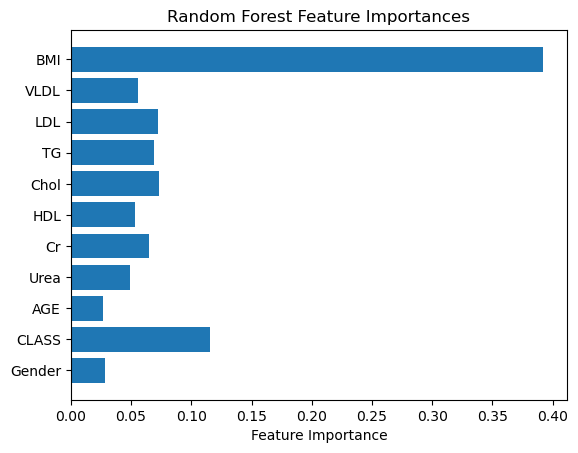

In [29]:
import matplotlib.pyplot as plt

importances = model.named_steps['classifier'].feature_importances_
feature_names = categorical_col + numerical_col
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()